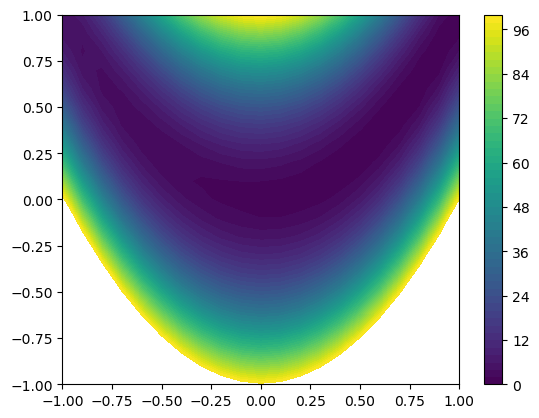

In [2]:
using PyPlot
f(x, y) = (1-x)^2+100*(y-x^2)^2

x = collect(-1:0.1:1)
y = collect(-1:0.1:1)

Z = [f(a, b) for b in y, a in x]
plt.contourf(x, y, Z, levels=collect(0:2:100))
plt.colorbar()
plt.show()

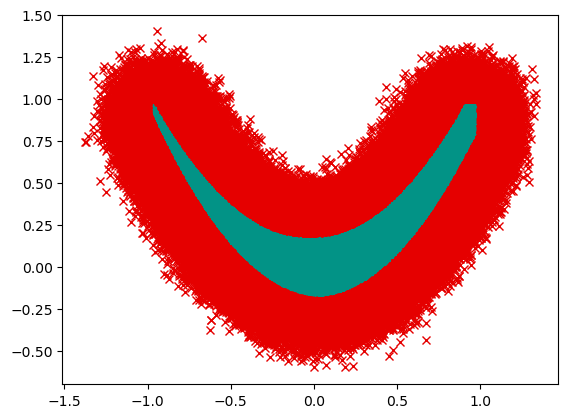

In [3]:
using Random
X, Y, Z = [], [], []
transition_model(x) = randn()*0.1 + x
# function transition_model(x; high=Inf, low=-Inf)
#     xnew = randn()*0.2 + x
#     if xnew > high
#         return high
#     elseif xnew < low
#         return low
#     else
#         return xnew
#     end
# end
function acceptance(v, vnew, x, y)
    if (x<-1) || (x>1) || (y<-1) || (y>1)
        return false
    end
        
    if vnew < v
        return true
    else
        accept = rand()
        return (accept < exp(v - vnew))
    end
end

function mcmc(x, y; iterations=1_000_000, walkers=1)
    accepted = []
    rejected = []
    v = f(x, y)
    for i=1:iterations
        xnew = transition_model(x)
        ynew = transition_model(y)
        vnew = f(xnew, ynew)
        if (acceptance(v, vnew, xnew, ynew))
            x = xnew
            y = ynew
            push!(accepted, [xnew, ynew])
        else
            push!(rejected, (xnew, ynew))
        end
    end
    return accepted, rejected
end

a, b = mcmc(0.0, -0.2)

ax = [j[1] for j in a]
ay = [j[2] for j in a]

bx = [j[1] for j in b]
by = [j[2] for j in b]

plt.plot(ax, ay, color="xkcd:teal")
plt.plot(bx, by, "x", color="xkcd:red")
plt.show()

size(h.weights) = (20, 20)
size((h.edges[1])[2:end]) = 

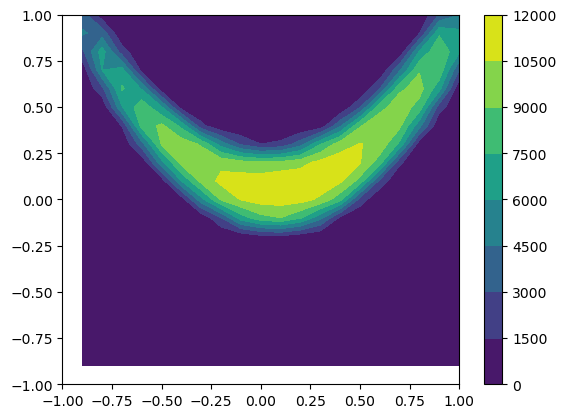

(20,)
size(h.edges[2]) = (21,)


In [4]:
using StatsBase

h = fit(Histogram, (ax, ay), (-1:0.1:1.0, -1:0.1:1.0))
h.edges[1]
@show size(h.weights)
@show size(h.edges[1][2:end])
@show size(h.edges[2])
plt.contourf(collect(h.edges[1][2:end]), collect(h.edges[2][2:end]), transpose(h.weights))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.colorbar()
plt.show()

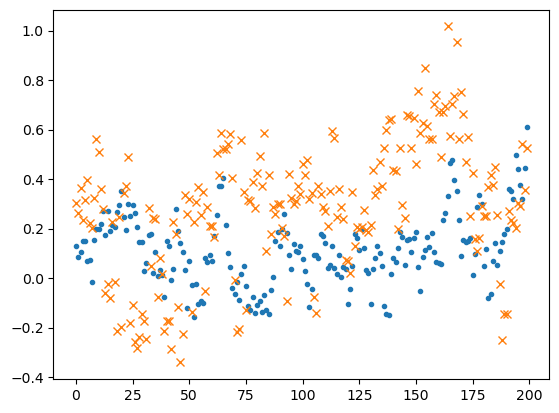

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe8902e8cd0>

In [4]:
plt.plot(ay[1:200], ".")
plt.plot(by[1:200], "x")

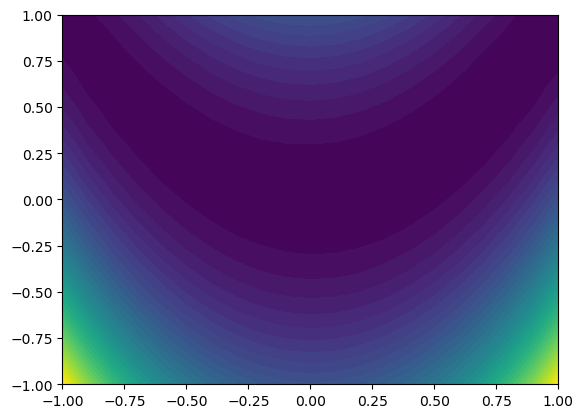

PyObject <matplotlib.contour.QuadContourSet object at 0x7fe890081040>

In [10]:
## Quadrant sampler
xr = collect(0:0.1:1)
xl = collect(0:-0.1:-1)
yu = collect(0:0.1:1)
yd = collect(0:-0.1:-1)

function getz(xset, yset)
    coords = []
    for y in yset
        rowz = Array{Float64}(undef, 0)
        for x in xset
            push!(rowz, f(x, y))
        end
        push!(coords, rowz)
    end
    return coords
end

## Go quad by quad
z1 = getz(xr, yu)
z2 = getz(xl, yu)
z3 = getz(xl, yd)
z4 = getz(xr, yd)

z2 = [reverse(a) for a in z2]
z3 = reverse([reverse(a) for a in z3])
z4 = reverse(z4)

X = vcat(reverse(xl), xr)
Y = vcat(reverse(yd), yu)
zleft = vcat(z3, z2)
zright = vcat(z4, z1)
Z = [vcat(i, j) for (i,j) in zip(zleft, zright)]
Z = hcat(Z...)'

levels = collect(0:10:400)
# plt.contourf(xr, yu, z1, levels=levels)
# plt.contourf(xl, yu, z2, levels=levels)
# plt.contourf(xl, yd, z3, levels=levels)
# plt.contourf(xr, yd, z4, levels=levels)
# plt.colorbar()
# plt.show()
plt.contourf(X, Y, Z, levels=levels)